In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Install Packages

Next, the dataset for weather prediction in Subang Jaya, Malaysia is uploaded. This dataset was procured by the NASA Meteorological website, and the coordinates are:
Latitude  3.039   Longitude 101.5963 

This dataset contains the weather parameters in Subang Jaya from the Year 2020 until the Year 2021 (January 2020 - December 2021).

In [48]:
from google.colab import files
uploaded = files.upload()

Saving Weather_Subang.csv to Weather_Subang (2).csv


Next, the dataset is read and described for EDA purposes

In [72]:
df = pd.read_csv('Weather_Subang (2).csv')

In [73]:
df.head()


,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_NKT,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M_MAX
0,2020,1,1,6.07,6.53,0.64,0.78,24.78,22.30,23.54,24.94,8.70,29.55,20.86,17.15,87.06,4.10,98.63,2.68,52.94,5.65
1,2020,1,2,4.40,6.31,0.46,0.57,24.96,22.86,23.91,25.10,8.38,29.80,21.42,17.76,88.94,7.73,98.69,2.45,51.69,5.87
2,2020,1,3,4.94,6.34,0.52,0.64,25.11,22.79,23.94,25.32,8.06,29.69,21.62,17.70,87.88,1.20,98.61,2.18,47.44,4.90
3,2020,1,4,5.37,6.43,0.56,0.70,25.06,22.57,23.82,25.28,8.12,29.80,21.69,17.46,87.06,0.04,98.44,2.34,46.88,5.41
4,2020,1,5,5.78,6.54,0.61,0.74,24.90,22.52,23.72,25.14,9.53,30.10,20.57,17.46,87.69,3.21,98.42,2.33,49.56,5.08


In [51]:
df.describe()

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_NKT,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M_MAX
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2020.499316,6.519836,15.738714,-14.363899,-238.217729,-249.724227,-249.654473,25.621683,23.073830,24.347729,25.635937,6.862257,29.475089,22.612681,18.066990,86.724679,8.558837,98.325075,1.617592,158.996689,3.838413
std,0.500342,3.451913,8.809949,137.685431,431.921831,433.285565,433.325904,0.784317,0.734361,0.657350,0.789761,1.746851,1.380425,0.971135,0.801967,3.484988,14.530801,0.117187,0.444086,74.998799,0.911659
min,2020.000000,1.000000,1.000000,-999.000000,-999.000000,-999.000000,-999.000000,22.970000,19.480000,21.310000,23.080000,2.090000,25.370000,17.840000,14.470000,74.560000,0.000000,98.000000,0.610000,25.500000,1.390000
25%,2020.000000,4.000000,8.000000,4.290000,5.940000,-499.465000,-499.455000,25.105000,22.730000,23.980000,25.120000,5.655000,28.585000,22.155000,17.700000,84.500000,1.465000,98.250000,1.300000,91.220000,3.220000
50%,2020.000000,7.000000,16.000000,4.960000,6.520000,0.460000,0.550000,25.620000,23.120000,24.360000,25.600000,6.680000,29.510000,22.730000,18.130000,86.880000,4.520000,98.320000,1.600000,164.880000,3.710000
75%,2021.000000,10.000000,23.000000,5.540000,6.820000,0.530000,0.630000,26.085000,23.530000,24.755000,26.120000,7.970000,30.380000,23.225000,18.550000,89.090000,10.355000,98.410000,1.865000,214.750000,4.340000
max,2021.000000,12.000000,31.000000,7.300000,7.420000,0.710000,0.840000,27.770000,25.030000,26.080000,27.990000,12.250000,34.400000,24.830000,20.390000,96.120000,164.590000,98.690000,4.020000,318.120000,8.300000


The headings for each columns have names that would be difficult to perform EDA and ML algorithms. Hence, the names of the columns would have to be changed.

In [74]:
df.rename({'MO': 'Month', 'DY': 'Day', 'ALLSKY_SFC_SW_DWN': 'Irradiation','T2M' : 'Max Temp',
           'T2MDEW': 'Dew Point Temp', 'RH2M': 'Relative Humidity', 'PRECTOTCORR': 'Precipitation', 'PS': 'Surface Pressure', 
           'WS10M': 'Wind Speed', '	WD10M': 'Wind Direction','WS50M_MAX': 'Max Wind Speed' }, axis=1, inplace=True)

In [54]:
df.head()

,YEAR,Month,Day,Irradiation,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_NKT,Max Temp,Dew Point Temp,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,Relative Humidity,Precipitation,Surface Pressure,Wind Speed,WD10M,Max Wind Speed
0,2020,1,1,6.07,6.53,0.64,0.78,24.78,22.30,23.54,24.94,8.70,29.55,20.86,17.15,87.06,4.10,98.63,2.68,52.94,5.65
1,2020,1,2,4.40,6.31,0.46,0.57,24.96,22.86,23.91,25.10,8.38,29.80,21.42,17.76,88.94,7.73,98.69,2.45,51.69,5.87
2,2020,1,3,4.94,6.34,0.52,0.64,25.11,22.79,23.94,25.32,8.06,29.69,21.62,17.70,87.88,1.20,98.61,2.18,47.44,4.90
3,2020,1,4,5.37,6.43,0.56,0.70,25.06,22.57,23.82,25.28,8.12,29.80,21.69,17.46,87.06,0.04,98.44,2.34,46.88,5.41
4,2020,1,5,5.78,6.54,0.61,0.74,24.90,22.52,23.72,25.14,9.53,30.10,20.57,17.46,87.69,3.21,98.42,2.33,49.56,5.08


Certain columns that were not re-named are to be dropped, as these columns do not significantly affect the output of the dataset

In [75]:
df.drop(['CLRSKY_SFC_SW_DWN', 'ALLSKY_KT', 'ALLSKY_NKT', 'T2MWET' ,'TS', 'T2M_RANGE', 'T2M_MAX',
        'T2M_MIN', 'QV2M','WD10M'], axis = 1, inplace = True)

Now the dataframe df would look like the following once the columns were dropped:

In [76]:
df.head(7)

,YEAR,Month,Day,Irradiation,Max Temp,Dew Point Temp,Relative Humidity,Precipitation,Surface Pressure,Wind Speed,Max Wind Speed
0,2020,1,1,6.07,24.78,22.30,87.06,4.10,98.63,2.68,5.65
1,2020,1,2,4.40,24.96,22.86,88.94,7.73,98.69,2.45,5.87
2,2020,1,3,4.94,25.11,22.79,87.88,1.20,98.61,2.18,4.90
3,2020,1,4,5.37,25.06,22.57,87.06,0.04,98.44,2.34,5.41
4,2020,1,5,5.78,24.90,22.52,87.69,3.21,98.42,2.33,5.08
5,2020,1,6,5.28,25.10,22.30,85.75,2.00,98.47,1.67,4.42
6,2020,1,7,5.92,25.33,22.63,86.00,0.18,98.39,1.73,3.86


Next, null values in the dataset is checked, after checking the type of data in 'df'

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               731 non-null    int64  
 1   Month              731 non-null    int64  
 2   Day                731 non-null    int64  
 3   Irradiation        731 non-null    float64
 4   Max Temp           731 non-null    float64
 5   Dew Point Temp     731 non-null    float64
 6   Relative Humidity  731 non-null    float64
 7   Precipitation      731 non-null    float64
 8   Surface Pressure   731 non-null    float64
 9   Wind Speed         731 non-null    float64
 10  Max Wind Speed     731 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 62.9 KB


As all of the variables are integer or float, all the variables in the dataset are continuous variables

In [78]:
df.isnull().sum()

YEAR                 0
Month                0
Day                  0
Irradiation          0
Max Temp             0
Dew Point Temp       0
Relative Humidity    0
Precipitation        0
Surface Pressure     0
Wind Speed           0
Max Wind Speed       0
dtype: int64

There were no missing values in the dataset. Hence, EDA can be performed on the dataset

However, Month should be a categorical variable, and must be converted as such.

In [79]:
import calendar
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x])

(array([641.,  61.,  16.,   6.,   3.,   0.,   0.,   0.,   3.,   1.]),
 array([  0.   ,  16.459,  32.918,  49.377,  65.836,  82.295,  98.754,
        115.213, 131.672, 148.131, 164.59 ]),
 <a list of 10 Patch objects>)

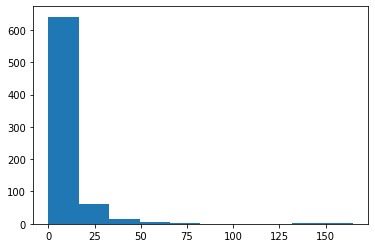

In [80]:
plt.hist(df['Precipitation'])

Text(0.5, 1.0, 'Precipitation vs Month')

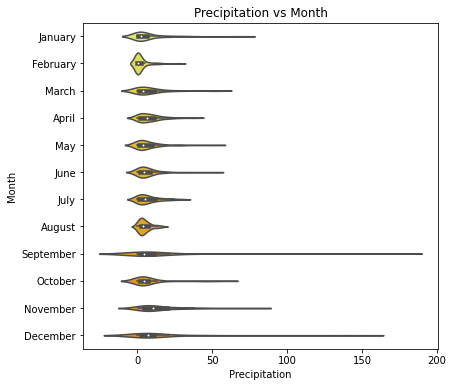

In [81]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='Precipitation', y='Month',data=df,palette='Wistia',ax=ax)
ax.set_title('Precipitation vs Month')


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 73.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.9% of the points cannot be placed; y

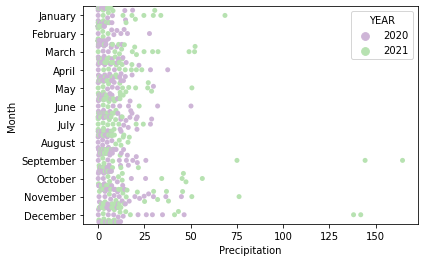

In [82]:
sns.swarmplot(x="Precipitation", y="Month", hue="YEAR", data=df, palette="PRGn")
plt.show()

The data for Precipitation has a few outliers, and this can be due to the unpredictable rainfall in Malaysia.

Next, a correlation map is produced to see the correlation between each variables. Since the target variable is Precipitation, all other variables that are correlated with Precipitation are studied.

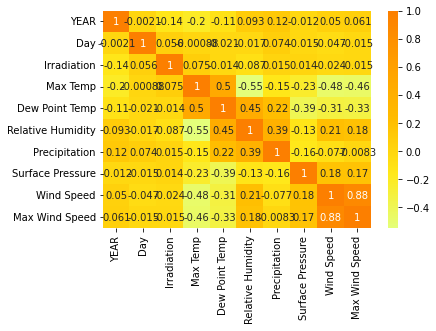

In [83]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

The variables that correlate with Precipitation are:

1. Surface Pressure
2. Relative Humidity
3. Dew Point Temperature
4. Irradiation

Although the values for correlation are < 0.5, these values are still considered for the final weather prediction.

In [86]:
from sklearn import linear_model
x=df[['Surface Pressure', 'Relative Humidity', 'Dew Point Temp', 'Irradiation']]
y=df["Precipitation"]

Linear Regression is used to predict Precipitation, based on the variables above.

In [87]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [89]:
predictedPREC = regr.predict([[98,87,22,3]])
print(predictedPREC)

[12.84779509]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Random values were entered from the above. However, using the following table from the "describe" function of the dataframe, predicted values can be computed

In [90]:
df.describe()

,YEAR,Day,Irradiation,Max Temp,Dew Point Temp,Relative Humidity,Precipitation,Surface Pressure,Wind Speed,Max Wind Speed
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2020.499316,15.738714,-14.363899,25.621683,23.073830,86.724679,8.558837,98.325075,1.617592,3.838413
std,0.500342,8.809949,137.685431,0.784317,0.734361,3.484988,14.530801,0.117187,0.444086,0.911659
min,2020.000000,1.000000,-999.000000,22.970000,19.480000,74.560000,0.000000,98.000000,0.610000,1.390000
25%,2020.000000,8.000000,4.290000,25.105000,22.730000,84.500000,1.465000,98.250000,1.300000,3.220000
50%,2020.000000,16.000000,4.960000,25.620000,23.120000,86.880000,4.520000,98.320000,1.600000,3.710000
75%,2021.000000,23.000000,5.540000,26.085000,23.530000,89.090000,10.355000,98.410000,1.865000,4.340000
max,2021.000000,31.000000,7.300000,27.770000,25.030000,96.120000,164.590000,98.690000,4.020000,8.300000


In [91]:
predictedPREC = regr.predict([[98.32,86.72,23.07,-14.36]]) #Mean values
print(predictedPREC)

[8.61562732]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [92]:
predictedPREC = regr.predict([[98.32,86.88,23.12,4.96]]) #Median values
print(predictedPREC)

[8.97957039]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [93]:
predictedPREC = regr.predict([[98.69,96.12,25.03,7.3]]) #75% values
print(predictedPREC)

[19.13391676]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [94]:
predictedPREC = regr.predict([[98.41,89.09,23.53,5.54]]) #75% values
print(predictedPREC)

[11.3709646]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


The values of the predictedPREC match the values in the dataset. Hence, this linear regression equation can be used to predict rainfall in Subang Jaya, Malaysia; based on the dependent variables in the equation.